In [39]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [2]:
import yfinance as yf

# Download all available historical data for Ambuja Cements
data = yf.download("AMBUJACEM.NS", period="max", interval="1d")

# Display the last few rows
print(data.tail())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker     AMBUJACEM.NS AMBUJACEM.NS AMBUJACEM.NS AMBUJACEM.NS AMBUJACEM.NS
Date                                                                       
2025-05-12   541.650024   544.099976   536.000000   540.000000      1225930
2025-05-13   536.900024   542.900024   534.299988   542.200012      3438632
2025-05-14   543.599976   545.000000   536.049988   540.000000      2627027
2025-05-15   547.549988   549.000000   539.200012   543.900024      3683829
2025-05-16   565.000000   565.849976   547.150024   548.200012      1743165


In [3]:
data.to_csv("ambuja_cements_history.csv", index=True, date_format='%Y-%m-%d')

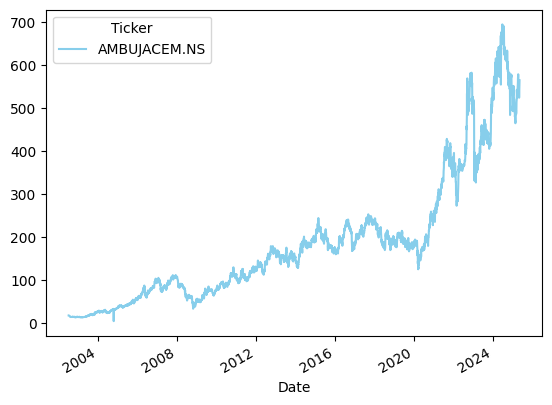

In [4]:
data["Close"].plot(color="skyblue")
plt.show()

In [5]:
df = data.copy()
df.head()

Price             Close         High          Low         Open       Volume
Ticker     AMBUJACEM.NS AMBUJACEM.NS AMBUJACEM.NS AMBUJACEM.NS AMBUJACEM.NS
Date                                                                       
2002-07-01    17.586594    17.674558    17.215886    17.291285       630442
2002-07-02    17.574024    17.762520    17.423228    17.586591      1007265
2002-07-03    17.316416    17.580309    17.215885    17.448363       178065
2002-07-04    17.310133    17.423230    17.259868    17.297568       199282
2002-07-05    17.322702    17.574029    17.190756    17.259870       138577

In [6]:
data.head()

Price             Close         High          Low         Open       Volume
Ticker     AMBUJACEM.NS AMBUJACEM.NS AMBUJACEM.NS AMBUJACEM.NS AMBUJACEM.NS
Date                                                                       
2002-07-01    17.586594    17.674558    17.215886    17.291285       630442
2002-07-02    17.574024    17.762520    17.423228    17.586591      1007265
2002-07-03    17.316416    17.580309    17.215885    17.448363       178065
2002-07-04    17.310133    17.423230    17.259868    17.297568       199282
2002-07-05    17.322702    17.574029    17.190756    17.259870       138577

In [7]:
df.isnull().sum()

Price   Ticker      
Close   AMBUJACEM.NS    0
High    AMBUJACEM.NS    0
Low     AMBUJACEM.NS    0
Open    AMBUJACEM.NS    0
Volume  AMBUJACEM.NS    0
dtype: int64

In [8]:
len(df)

5679

In [9]:
print(df.columns)
print(df.info())
print(df["Close"].head())


MultiIndex([( 'Close', 'AMBUJACEM.NS'),
            (  'High', 'AMBUJACEM.NS'),
            (   'Low', 'AMBUJACEM.NS'),
            (  'Open', 'AMBUJACEM.NS'),
            ('Volume', 'AMBUJACEM.NS')],
           names=['Price', 'Ticker'])
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5679 entries, 2002-07-01 to 2025-05-16
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, AMBUJACEM.NS)   5679 non-null   float64
 1   (High, AMBUJACEM.NS)    5679 non-null   float64
 2   (Low, AMBUJACEM.NS)     5679 non-null   float64
 3   (Open, AMBUJACEM.NS)    5679 non-null   float64
 4   (Volume, AMBUJACEM.NS)  5679 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 266.2 KB
None
Ticker      AMBUJACEM.NS
Date                    
2002-07-01     17.586594
2002-07-02     17.574024
2002-07-03     17.316416
2002-07-04     17.310133
2002-07-05     17.322702


In [10]:
df.columns = [col[0] for col in df.columns]  # OR combine both levels if needed
df.head()

Close       High        Low       Open   Volume
Date                                                           
2002-07-01  17.586594  17.674558  17.215886  17.291285   630442
2002-07-02  17.574024  17.762520  17.423228  17.586591  1007265
2002-07-03  17.316416  17.580309  17.215885  17.448363   178065
2002-07-04  17.310133  17.423230  17.259868  17.297568   199282
2002-07-05  17.322702  17.574029  17.190756  17.259870   138577

In [11]:
l = [7, 21, 30, 160]
for i in l:
    df[f"Moving Avg {i}"] = df["Close"].rolling(window=i).mean()
df.tail()

Close        High         Low        Open   Volume  \
Date                                                                  
2025-05-12  541.650024  544.099976  536.000000  540.000000  1225930   
2025-05-13  536.900024  542.900024  534.299988  542.200012  3438632   
2025-05-14  543.599976  545.000000  536.049988  540.000000  2627027   
2025-05-15  547.549988  549.000000  539.200012  543.900024  3683829   
2025-05-16  565.000000  565.849976  547.150024  548.200012  1743165   

            Moving Avg 7  Moving Avg 21  Moving Avg 30  Moving Avg 160  
Date                                                                    
2025-05-12    533.385733     549.095247     544.106673      543.365626  
2025-05-13    534.592878     549.100010     544.651674      542.827501  
2025-05-14    534.907157     548.900010     545.023340      542.349376  
2025-05-15    536.678580     548.847627     545.181673      541.969063  
2025-05-16    540.935721     549.178580     546.070007      541.646876

C:\Dev-Cpp\mingw32\bin\ipykernel_8616\1803087011.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # nicer background and grid


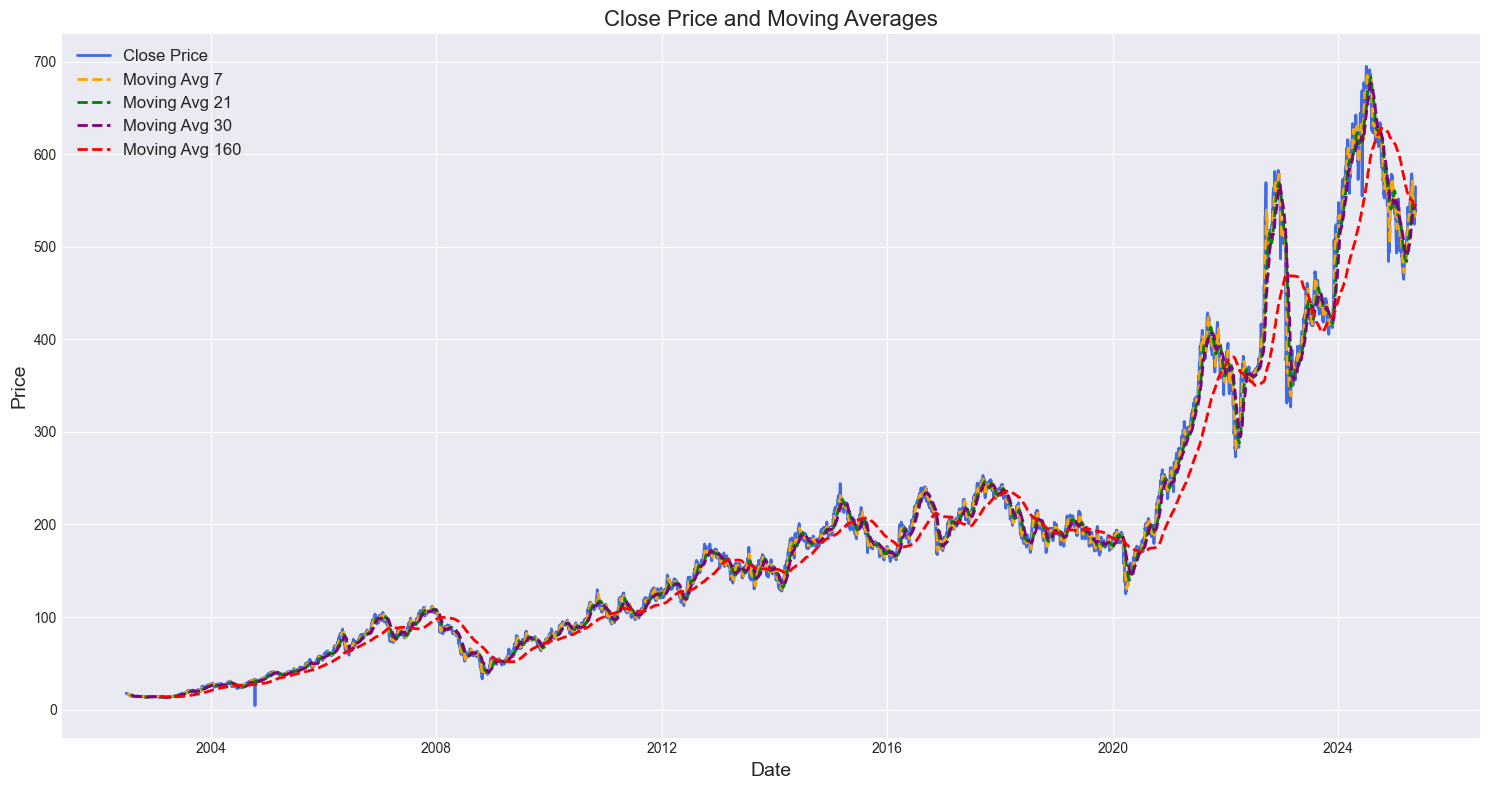

In [12]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')  # nicer background and grid

plt.figure(figsize=(15, 8))

# Colors for each plot line
colors = {
    "Close": "royalblue",
    "Moving Avg 7": "orange",
    "Moving Avg 21": "green",
    "Moving Avg 30": "purple",
    "Moving Avg 160": "red"
}

# Plot Close price
plt.plot(df.index, df["Close"], label="Close Price", color=colors["Close"], linewidth=2)

# Plot all moving averages with different colors and line styles
for window in [7, 21, 30, 160]:
    plt.plot(
        df.index,
        df[f"Moving Avg {window}"],
        label=f"Moving Avg {window}",
        color=colors[f"Moving Avg {window}"],
        linewidth=2,
        linestyle='--'
    )

plt.title("Close Price and Moving Averages", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Calculate EMA with different spans
df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()
df['EMA_21'] = df['Close'].ewm(span=21, adjust=False).mean()
df['EMA_30'] = df["Close"].ewm(span=30, adjust=False).mean()
df['EMA_160'] = df["Close"].ewm(span=160, adjust=False).mean()

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming your dataframe is named df and contains the columns:
# 'Close', 'Moving Avg 7', 'Moving Avg 21', 'Moving Avg 30', 'Moving Avg 160'

metrics = {}
df.dropna(inplace=True)
for col in ["Moving Avg 7", "Moving Avg 21", "Moving Avg 30", "Moving Avg 160"]:
    r2 = r2_score(df["Close"], df[col])
    mse = mean_squared_error(df["Close"], df[col])
    metrics[col] = {"R2": r2, "MSE": mse}

# Print results
for key, value in metrics.items():
    print(f"{key}: R2 = {value['R2']:.4f}, MSE = {value['MSE']:.4f}")


Moving Avg 7: R2 = 0.9979, MSE = 46.7518
Moving Avg 21: R2 = 0.9930, MSE = 157.8937
Moving Avg 30: R2 = 0.9898, MSE = 231.0799
Moving Avg 160: R2 = 0.9448, MSE = 1250.4620


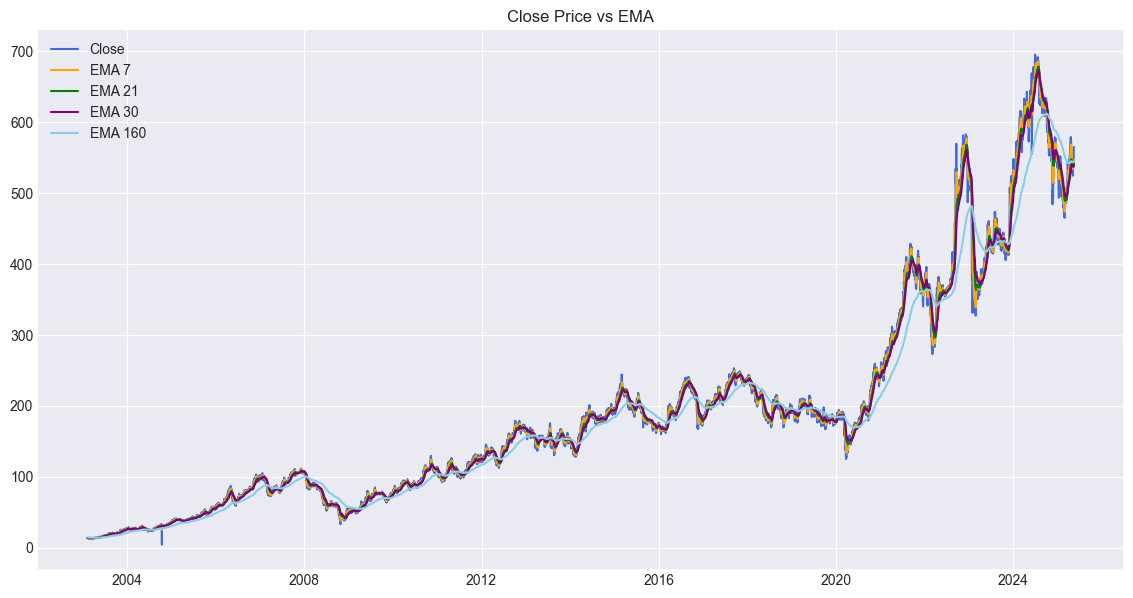

In [17]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close', color='royalblue')
plt.plot(df['EMA_7'], label='EMA 7', color='orange')
plt.plot(df['EMA_21'], label='EMA 21', color='green')
plt.plot(df['EMA_30'], label='EMA 30', color='purple')
plt.plot(df['EMA_160'], label='EMA 160', color='skyblue')
plt.legend()
plt.title('Close Price vs EMA')
plt.show()

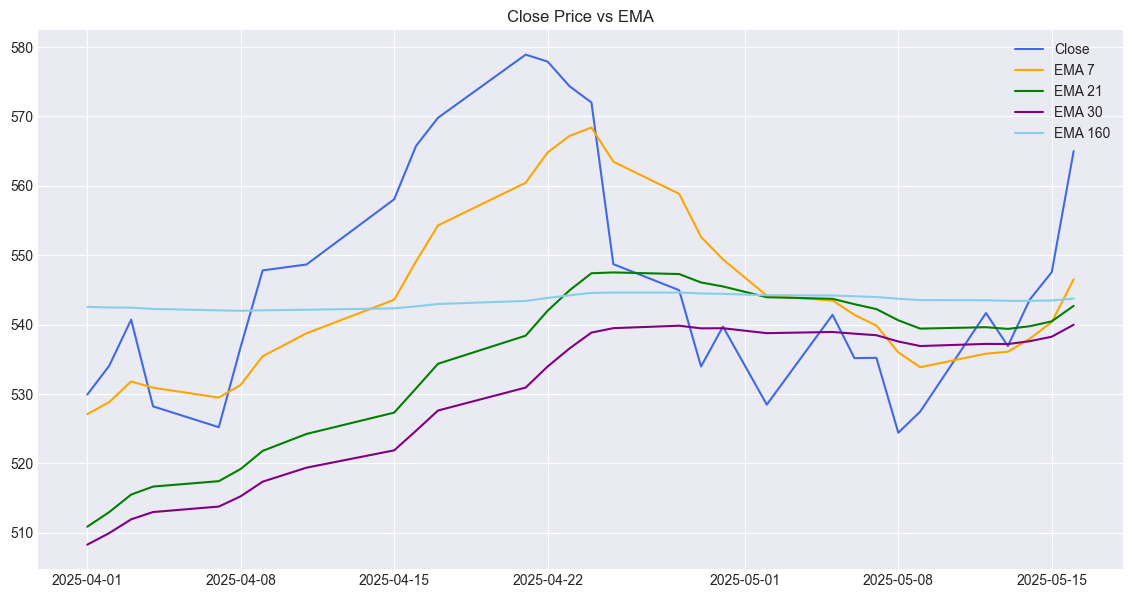

In [18]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'].tail(30), label='Close', color='royalblue')
plt.plot(df['EMA_7'].tail(30), label='EMA 7', color='orange')
plt.plot(df['EMA_21'].tail(30), label='EMA 21', color='green')
plt.plot(df['EMA_30'].tail(30), label='EMA 30', color='purple')
plt.plot(df['EMA_160'].tail(30), label='EMA 160', color='skyblue')
plt.legend()
plt.title('Close Price vs EMA')
plt.show()

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
for col in ['EMA_7', 'EMA_21','EMA_30','EMA_160']:
    r2 = r2_score(df['Close'], df[col])
    mse = mean_squared_error(df['Close'], df[col])
    print(f"{col}: R2 = {r2:.4f}, MSE = {mse:.4f}")

EMA_7: R2 = 0.9986, MSE = 32.1475
EMA_21: R2 = 0.9948, MSE = 117.3717
EMA_30: R2 = 0.9923, MSE = 173.2600
EMA_160: R2 = 0.9616, MSE = 869.0164


In [20]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data: use index as time variable
X = np.arange(len(df)).reshape(-1,1)
y = df['Close'].values

In [21]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [22]:
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

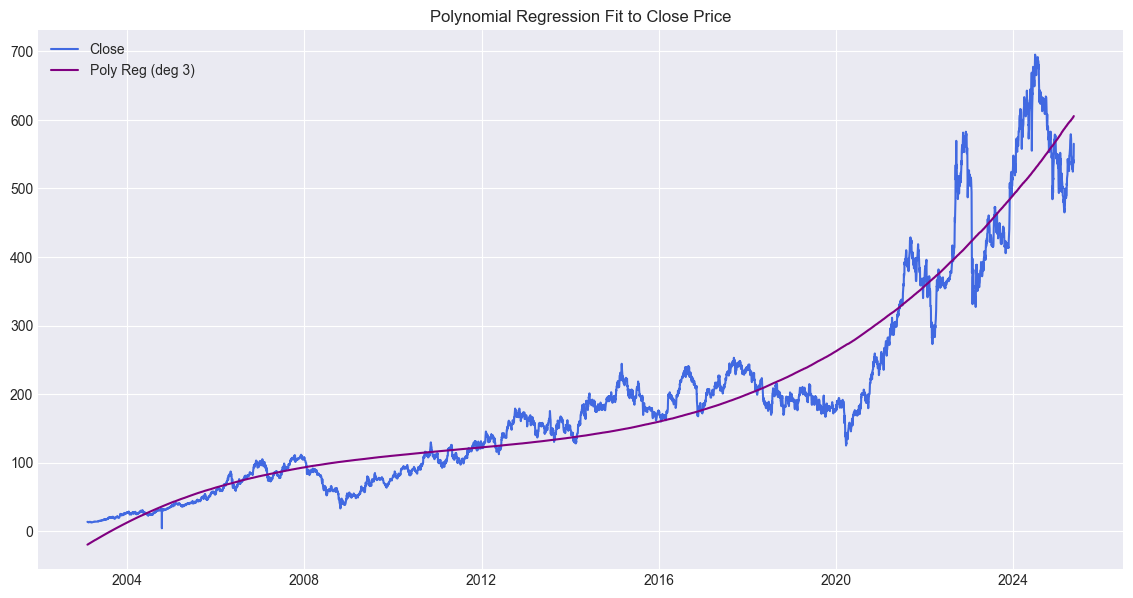

In [23]:
plt.figure(figsize=(14,7))
plt.plot(df.index, y, label='Close', color='royalblue')
plt.plot(df.index, y_pred, label='Poly Reg (deg 3)', color='purple')
plt.legend()
plt.title('Polynomial Regression Fit to Close Price')
plt.show()

In [24]:
# Metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print(f"Polynomial Regression: R2 = {r2:.4f}, MSE = {mse:.4f}")

Polynomial Regression: R2 = 0.9099, MSE = 2040.7402


In [25]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")

if result[1] > 0.05:
    print("Series is non-stationary — consider differencing (d>=1)")
else:
    print("Series is stationary")


ADF Statistic: -0.3426
p-value: 0.9193
Series is non-stationary — consider differencing (d>=1)


In [27]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] > 0.05:
        print("Series is non-stationary. Differencing needed.")
        return False
    else:
        print("Series is stationary. No differencing needed.")
        return True

# Test original series
print("Testing original Close series:")
is_stationary = test_stationarity(df['Close'])

# If non-stationary, difference and test again
if not is_stationary:
    print("\nTesting differenced Close series (1st difference):")
    is_stationary = test_stationarity(df['Close'].diff())

# You can continue differencing further if needed


Testing original Close series:
ADF Statistic: -0.3426
p-value: 0.9193
Series is non-stationary. Differencing needed.

Testing differenced Close series (1st difference):
ADF Statistic: -12.2576
p-value: 0.0000
Series is stationary. No differencing needed.


### d = 1

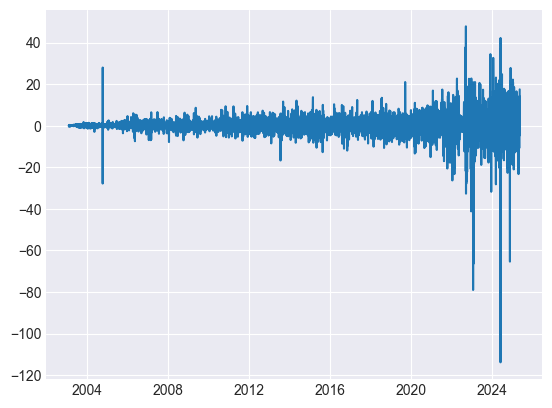

In [28]:
plt.plot(df['Close'].diff())
plt.show()

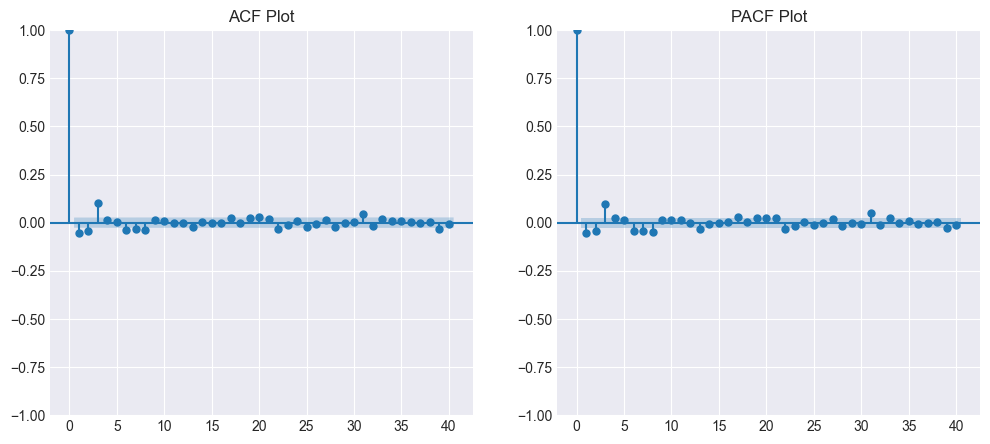

In [29]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))

plt.subplot(121)
plot_acf(df['Close'].diff().dropna(), ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df['Close'].diff().dropna(), ax=plt.gca(), lags=40, method='ywm')
plt.title('PACF Plot')

plt.show()


In [30]:
import pmdarima as pm

auto_model = pm.auto_arima(df['Close'], seasonal=False, trace=True,
                           error_action='ignore', suppress_warnings=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33700.436, Time=4.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33749.569, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33737.026, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33735.819, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33749.648, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=33706.252, Time=2.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=33702.253, Time=2.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=33669.013, Time=4.83 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=33676.951, Time=1.94 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=33650.517, Time=8.96 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=33678.759, Time=3.36 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=33648.172, Time=10.98 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=33675.572, Time=5.94 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=33645.804, Time=12.02 sec
 ARIMA(4,1,3)(0,0

In [33]:
print(auto_model.summary())  # Model is already fitted


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5520
Model:               SARIMAX(3, 1, 4)   Log Likelihood              -16813.061
Date:                Fri, 16 May 2025   AIC                          33644.122
Time:                        12:23:20   BIC                          33703.666
Sample:                             0   HQIC                         33664.887
                               - 5520                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0805      0.059      1.360      0.174      -0.036       0.197
ar.L1          0.7190      0.071     10.187      0.000       0.581       0.857
ar.L2         -0.1488      0.065     -2.290      0.0

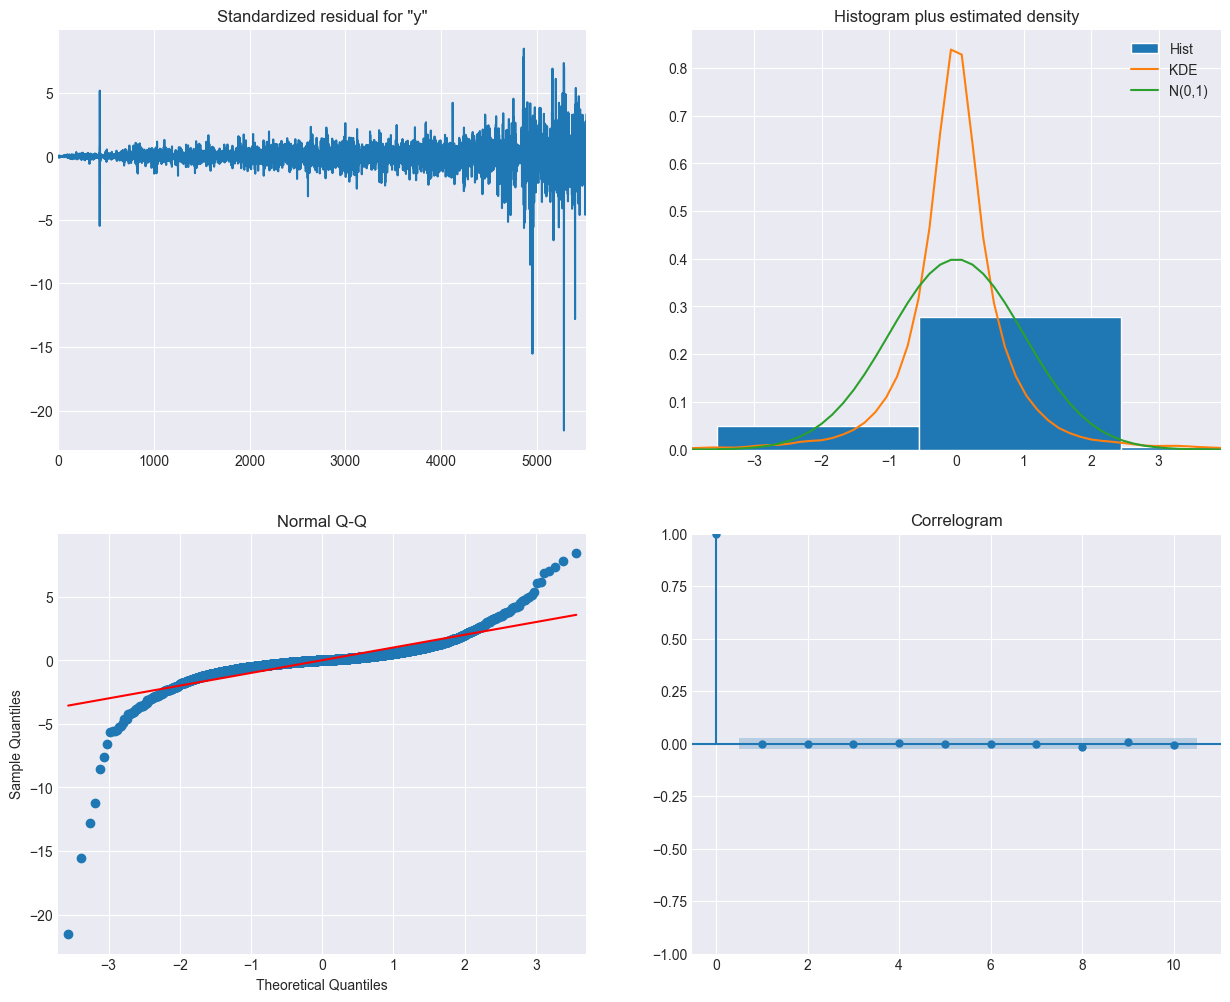

In [34]:
auto_model.arima_res_.plot_diagnostics(figsize=(15, 12))
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


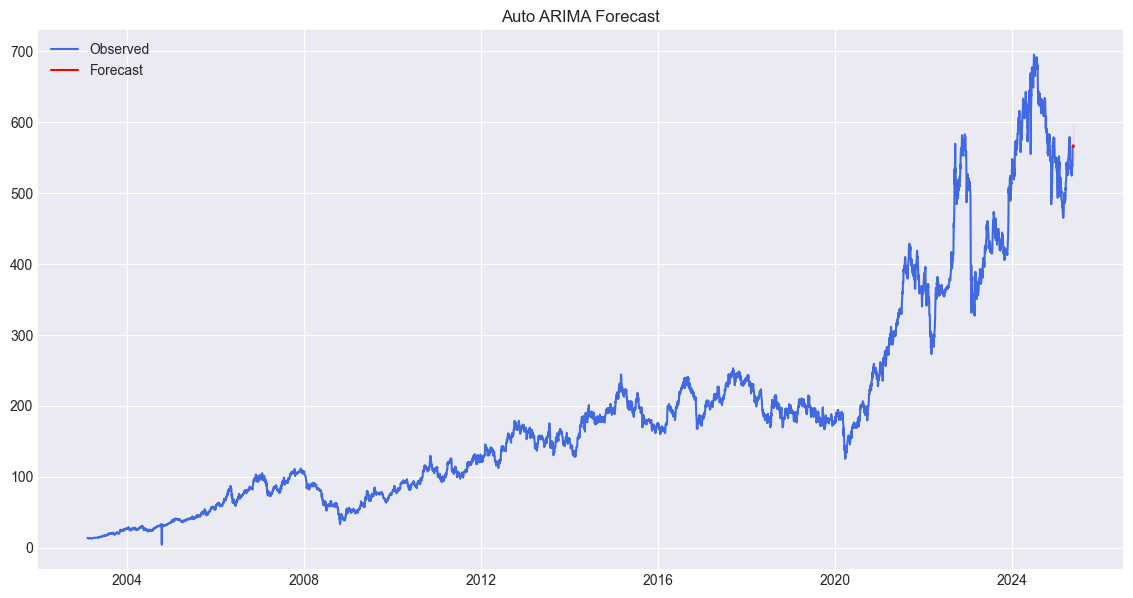

In [37]:
import pandas as pd
n_periods = 10
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Create datetime index for forecast, assuming daily frequency here
forecast_index = pd.date_range(start=df.index[-1], periods=n_periods + 1, freq='D')[1:]

plt.figure(figsize=(14,7))
plt.plot(df.index, df['Close'], label='Observed', color='royalblue')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.fill_between(forecast_index,
                 conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Auto ARIMA Forecast')
plt.show()

### LSTM with volatility feature

In [59]:
volatility = df['Close'].rolling(window=10).std().values  # You can tune the window size
volatility

array([        nan,         nan,         nan, ...,  6.63030468,
        7.59221178, 11.33524127])

In [60]:
features = np.column_stack((close_prices, volatility))
features = features[~np.isnan(features).any(axis=1)]  # Remove rows with NaN from rolling std


In [61]:
features

array([[1.30547647e+01, 2.60416175e-01],
       [1.31247110e+01, 2.41168657e-01],
       [1.33981419e+01, 2.02505845e-01],
       ...,
       [5.43599976e+02, 6.63030468e+00],
       [5.47549988e+02, 7.59221178e+00],
       [5.65000000e+02, 1.13352413e+01]])

In [64]:
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(features)):
    X.append(features[i-sequence_length:i])
    y.append(features[i][0])  # Predicting price (first column)
X, y = np.array(X), np.array(y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_shape = X.shape
X = X.reshape(-1, X.shape[-1])  # Flatten for scaler
X = scaler.fit_transform(X)
X = X.reshape(X_shape)  # Reshape back for LSTM

input_shape = (sequence_length, 2)  # 2 features: price, volatility

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 2)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])


In [65]:
model.compile(optimizer='adam', loss='mean_squared_error')

# --- 5. Train the Model ---
model.fit(X, y, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
171/171 [==============================] - 16s 63ms/step - loss: 43876.1523
Epoch 2/20
171/171 [==============================] - 10s 60ms/step - loss: 23960.5059
Epoch 3/20
171/171 [==============================] - 10s 57ms/step - loss: 22253.3418
Epoch 4/20
171/171 [==============================] - 10s 58ms/step - loss: 8708.0107
Epoch 5/20
171/171 [==============================] - 10s 57ms/step - loss: 2426.5635
Epoch 6/20
171/171 [==============================] - 10s 57ms/step - loss: 951.3798
Epoch 7/20
171/171 [==============================] - 11s 63ms/step - loss: 659.6372
Epoch 8/20
171/171 [==============================] - 10s 58ms/step - loss: 540.2958
Epoch 9/20
171/171 [==============================] - 10s 58ms/step - loss: 473.6402
Epoch 10/20
171/171 [==============================] - 10s 58ms/step - loss: 463.0648
Epoch 11/20
171/171 [==============================] - 10s 59ms/step - loss: 461.2473
Epoch 12/20
171/171 [==============================] - 

In [66]:
# --- 6. Predict on Recent Data ---
last_sequence = features[-sequence_length:]  # Last 60 rows (price + volatility)
last_sequence_scaled = scaler.transform(last_sequence)
last_sequence_scaled = last_sequence_scaled.reshape((1, sequence_length, 2))

predicted_price = model.predict(last_sequence_scaled)
print(f"🔮 Predicted Next Closing Price: {predicted_price[0][0]:.2f}")

1/1 [==============================] - 1s 1s/step
🔮 Predicted Next Closing Price: 536.96


Epoch 1/10
137/137 [==============================] - 9s 63ms/step - loss: 117.9440
Epoch 2/10
137/137 [==============================] - 8s 62ms/step - loss: 118.2820
Epoch 3/10
137/137 [==============================] - 8s 58ms/step - loss: 119.6380
Epoch 4/10
137/137 [==============================] - 8s 60ms/step - loss: 113.8252
Epoch 5/10
137/137 [==============================] - 9s 63ms/step - loss: 113.2811
Epoch 6/10
137/137 [==============================] - 8s 60ms/step - loss: 112.2227
Epoch 7/10
137/137 [==============================] - 8s 59ms/step - loss: 103.8113
Epoch 8/10
137/137 [==============================] - 8s 60ms/step - loss: 109.3435
Epoch 9/10
137/137 [==============================] - 8s 57ms/step - loss: 103.5086
Epoch 10/10
35/35 [==============================] - 1s 22ms/step


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


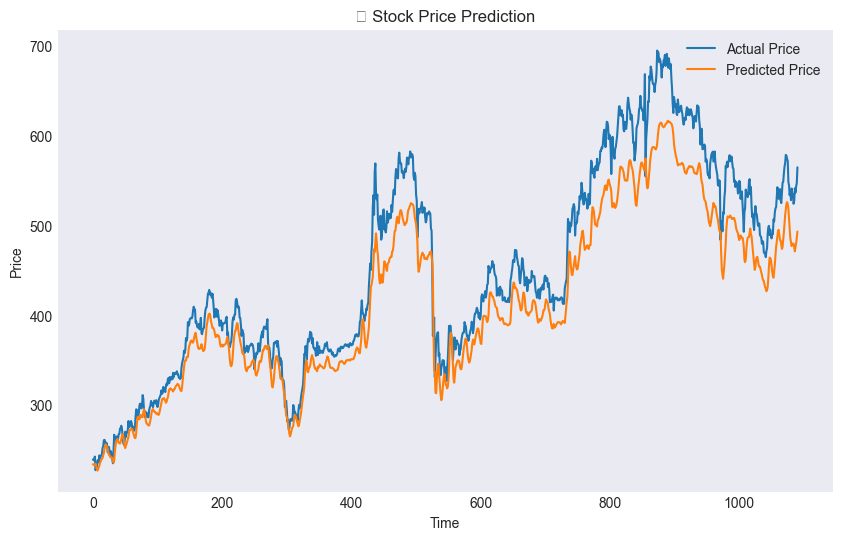

In [67]:
# Split test set (last N days)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
y_pred = model.predict(X_test)

plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title("📈 Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [68]:
future_days = 5
forecast = []

last_input = features[-sequence_length:].copy()

for _ in range(future_days):
    input_scaled = scaler.transform(last_input)
    input_scaled = input_scaled.reshape((1, sequence_length, 2))

    next_price = model.predict(input_scaled)[0][0]
    forecast.append(next_price)

    # Estimate next volatility (you can keep it same or apply a heuristic)
    next_vol = np.std(last_input[:, 0][-10:])  # Approximate volatility
    next_input = np.array([next_price, next_vol])

    # Update sequence
    last_input = np.vstack((last_input[1:], next_input))


1/1 [==============================] - 0s 38ms/step


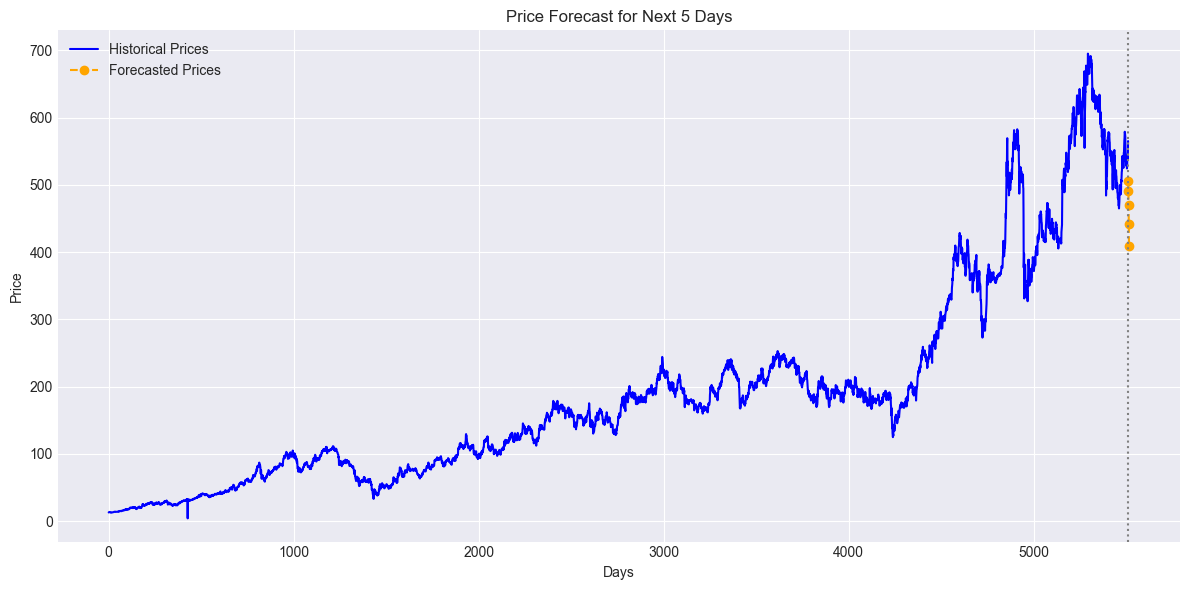

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'features'[:, 0] contains historical price values
historical_prices = features[:, 0]

# X-axis for plotting
historical_days = np.arange(len(historical_prices))
forecast_days = np.arange(len(historical_prices), len(historical_prices) + future_days)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(historical_days, historical_prices, label="Historical Prices", color='blue')
plt.plot(forecast_days, forecast, label="Forecasted Prices", color='orange', linestyle='--', marker='o')
plt.axvline(x=len(historical_prices)-1, color='gray', linestyle='dotted')  # Marks the forecast start point
plt.title("Price Forecast for Next {} Days".format(future_days))
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


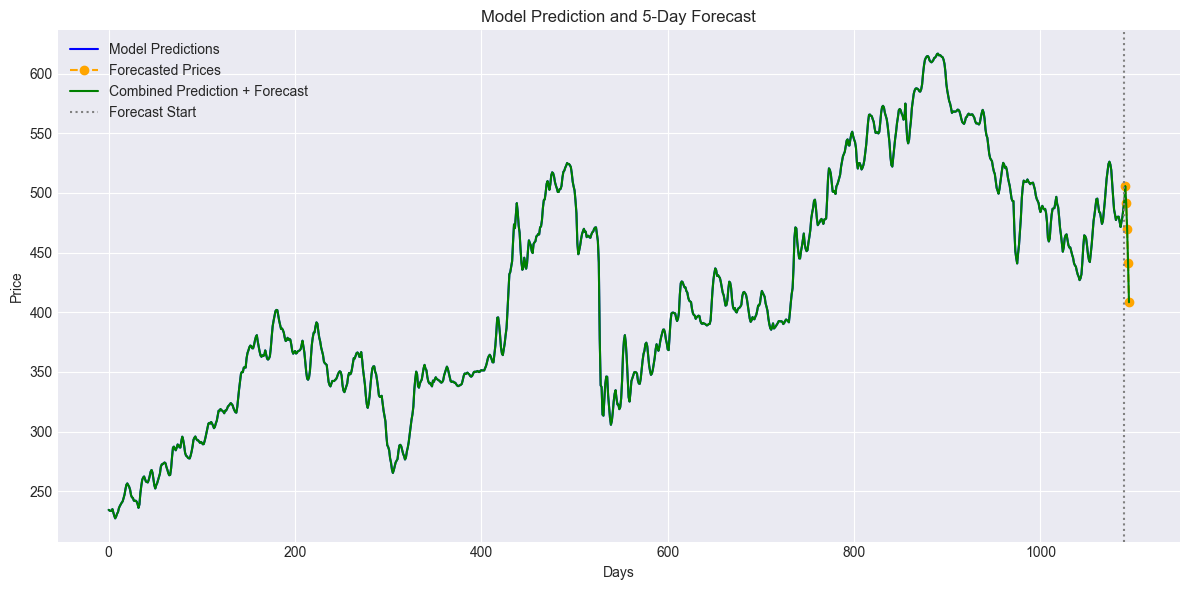

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_pred is 1D array of model predictions on test set
# and forecast is the array of future predicted prices
y_pred = y_pred.flatten()  # Ensure it's a 1D array
forecast = np.array(forecast).flatten()

# Define X-axis ranges
prediction_days = np.arange(len(y_pred))
forecast_days = np.arange(len(y_pred), len(y_pred) + len(forecast))
combined_days = np.arange(len(y_pred) + len(forecast))

# Combine prediction + forecast
combined = np.concatenate([y_pred, forecast])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(prediction_days, y_pred, label="Model Predictions", color='blue')
plt.plot(forecast_days, forecast, label="Forecasted Prices", color='orange', linestyle='--', marker='o')
plt.plot(combined_days, combined, label="Combined Prediction + Forecast", color='green')

# Mark forecast starting point
plt.axvline(x=len(y_pred)-1, color='gray', linestyle='dotted', label='Forecast Start')

# Formatting
plt.title(f"Model Prediction and {len(forecast)}-Day Forecast")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### LSTM"

In [40]:
close_prices = df['Close'].values  # raw prices

sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(close_prices)):
    X.append(close_prices[i-sequence_length:i])
    y.append(close_prices[i])
X, y = np.array(X), np.array(y)

# Reshape for LSTM: [samples, time steps, features=1]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 

In [58]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
154/154 [==============================] - 9s 61ms/step - loss: 157.5548 - val_loss: 1348.2137
Epoch 2/100
154/154 [==============================] - 9s 61ms/step - loss: 179.4559 - val_loss: 2649.6316
Epoch 3/100
154/154 [==============================] - 10s 63ms/step - loss: 164.8459 - val_loss: 2606.8157
Epoch 4/100
154/154 [==============================] - 11s 69ms/step - loss: 155.6390 - val_loss: 1932.1232
Epoch 5/100
154/154 [==============================] - 10s 64ms/step - loss: 164.7697 - val_loss: 2080.2053
Epoch 6/100
154/154 [==============================] - 10s 64ms/step - loss: 140.3357 - val_loss: 1798.8906
Epoch 7/100
154/154 [==============================] - 9s 59ms/step - loss: 144.8292 - val_loss: 2168.8845
Epoch 8/100
154/154 [==============================] - 12s 75ms/step - loss: 164.5454 - val_loss: 2723.5173
Epoch 9/100
154/154 [==============================] - 12s 78ms/step - loss: 159.2705 - val_loss: 2163.3511
Epoch 10/100
154/154 [=========

KeyboardInterrupt: 

In [45]:
# Predict
predicted = model.predict(X)

171/171 [==============================] - 5s 23ms/step


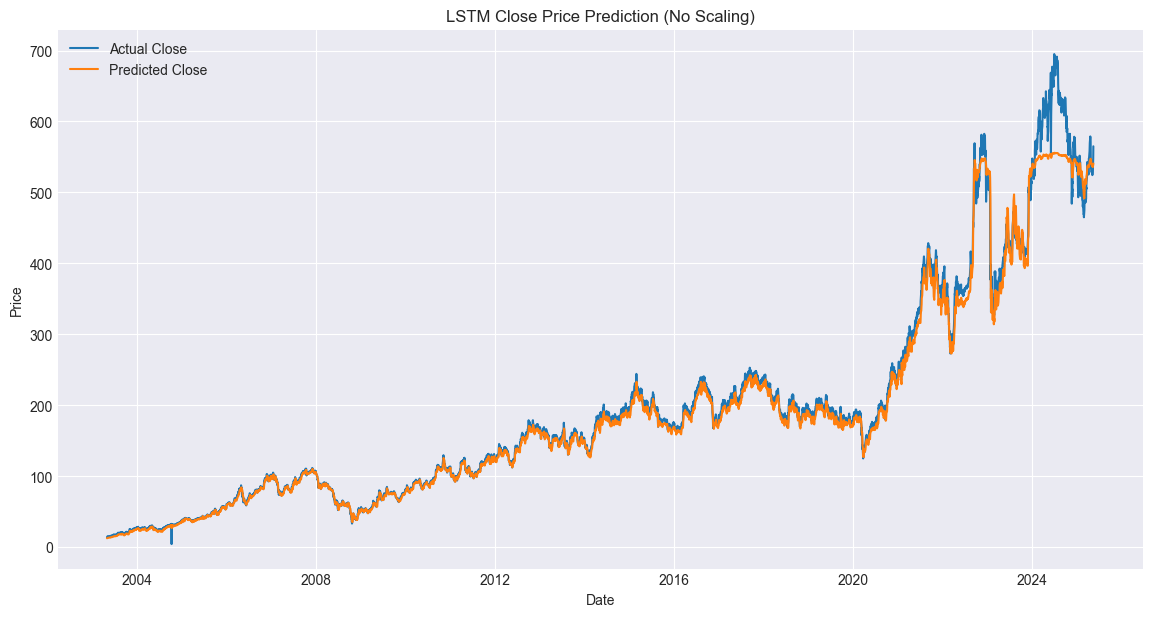

In [46]:
# Plot actual vs predicted
plt.figure(figsize=(14,7))
plt.plot(df.index[sequence_length:], y, label='Actual Close')
plt.plot(df.index[sequence_length:], predicted.flatten(), label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM Close Price Prediction (No Scaling)')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")


MSE:  278.8240
RMSE: 16.6980
MAE:  8.2479
R²:   0.9876


In [56]:
forecast_days = 10
input_seq = close_prices[-sequence_length:].tolist()  # Start from last 60 days

forecast = []

for _ in range(forecast_days):
    x_input = np.array(input_seq[-sequence_length:]).reshape(1, sequence_length, 1)
    pred = model.predict(x_input, verbose=0)[0][0]
    forecast.append(pred)
    input_seq.append(pred)  # Append prediction to the sequence


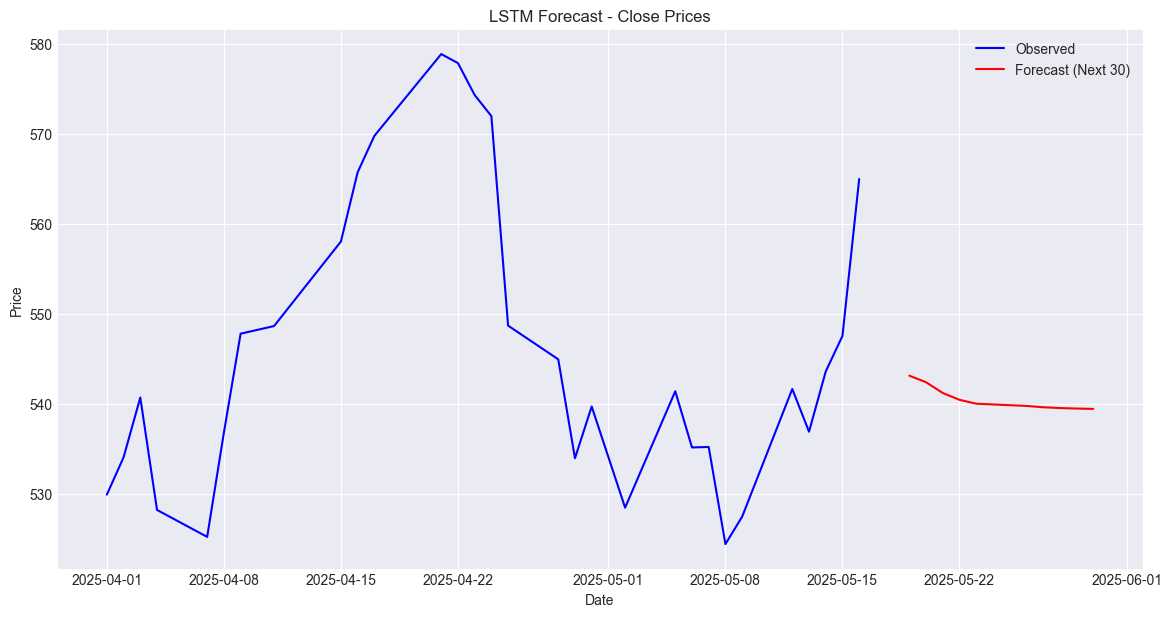

In [57]:
plt.figure(figsize=(14,7))

# Plot observed
plt.plot(df.index[-30:], close_prices[-30:], label='Observed', color='blue')

# Forecast future days (assumes daily data)
future_index = pd.date_range(df.index[-1], periods=forecast_days+1, freq='B')[1:]
plt.plot(future_index, forecast, label='Forecast (Next 30)', color='red')

plt.title('LSTM Forecast - Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


### GARCH

In [72]:
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))
df.dropna(inplace=True)
df.head()

Close       High        Low       Open   Volume  Moving Avg 7  \
Date                                                                            
2003-02-10  13.690653  13.995878  13.588911  13.995878   372300     13.584365   
2003-02-11  13.499882  13.989515  13.417217  13.989515   603225     13.600716   
2003-02-12  13.512604  13.728806  13.398144  13.423580   730800     13.582548   
2003-02-13  13.512604  13.512604  13.512604  13.512604        0     13.572556   
2003-02-14  13.016608  13.563472  12.902150  13.563472  2047912     13.496250   

            Moving Avg 21  Moving Avg 30  Moving Avg 160      EMA_7  \
Date                                                                  
2003-02-10      13.743337      13.804049       14.234350  13.611711   
2003-02-11      13.723655      13.792391       14.208886  13.583753   
2003-02-12      13.681262      13.778825       14.185113  13.565966   
2003-02-13      13.643412      13.755934       14.161378  13.552625   
2003-02-14      13.581035      13.723715       14.134465  13.418621   

               EMA_21     EMA_30    EMA_160  LogReturn  
Date                                                    
2003-02-10  13.679774  13.722738  14.461483   0.000930  
2003-02-11  13.663420  13.708360  14.449538  -0.014032  
2003-02-12  13.649710  13.695731  14.437899   0.000942  
2003-02-13  13.637246  13.683916  14.426405   0.000000  
2003-02-14  13.580824  13.640864  14.408892  -0.037397

In [73]:
import ta  # Technical Analysis library

# Ensure df has 'Price' column
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
macd = ta.trend.MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()
bb = ta.volatility.BollingerBands(df['Close'], window=20, window_dev=2)
df['BB_high'] = bb.bollinger_hband()
df['BB_low'] = bb.bollinger_lband()

df.dropna(inplace=True)
df.head()

Close       High        Low       Open   Volume  Moving Avg 7  \
Date                                                                            
2003-03-27  13.506242  13.595266  13.404500  13.410859  1626360     13.302759   
2003-03-28  13.563471  13.607983  13.309116  13.309116   821295     13.359988   
2003-03-31  13.563471  13.601624  13.461729  13.487164   541590     13.415401   
2003-04-01  13.798751  13.862339  13.404500  13.563472  1528822     13.503516   
2003-04-02  13.913208  14.014951  13.824184  13.862337   792112     13.589815   

            Moving Avg 21  Moving Avg 30  Moving Avg 160      EMA_7  \
Date                                                                  
2003-03-27      13.231902      13.238958       13.774825  13.312866   
2003-03-28      13.223726      13.257187       13.772202  13.375517   
2003-03-31      13.216762      13.273720       13.769023  13.422506   
2003-04-01      13.220093      13.290465       13.767949  13.516567   
2003-04-02      13.229480      13.315052       13.767433  13.615727   

               EMA_21     EMA_30    EMA_160  LogReturn        RSI      MACD  \
Date                                                                          
2003-03-27  13.246089  13.283999  14.053641   0.007087  60.284829 -0.014806   
2003-03-28  13.274942  13.302029  14.047552   0.004228  62.154892  0.011360   
2003-03-31  13.301172  13.318896  14.041539   0.000000  62.154892  0.031731   
2003-04-01  13.346406  13.349855  14.038523   0.017198  69.093698  0.066098   
2003-04-02  13.397934  13.386200  14.036966   0.008261  71.802220  0.101402   

            MACD_signal    BB_high     BB_low  
Date                                           
2003-03-27    -0.093415  13.895447  12.518032  
2003-03-28    -0.072460  13.869469  12.529384  
2003-03-31    -0.051622  13.838571  12.543749  
2003-04-01    -0.028078  13.856956  12.533631  
2003-04-02    -0.002182  13.914297  12.502361

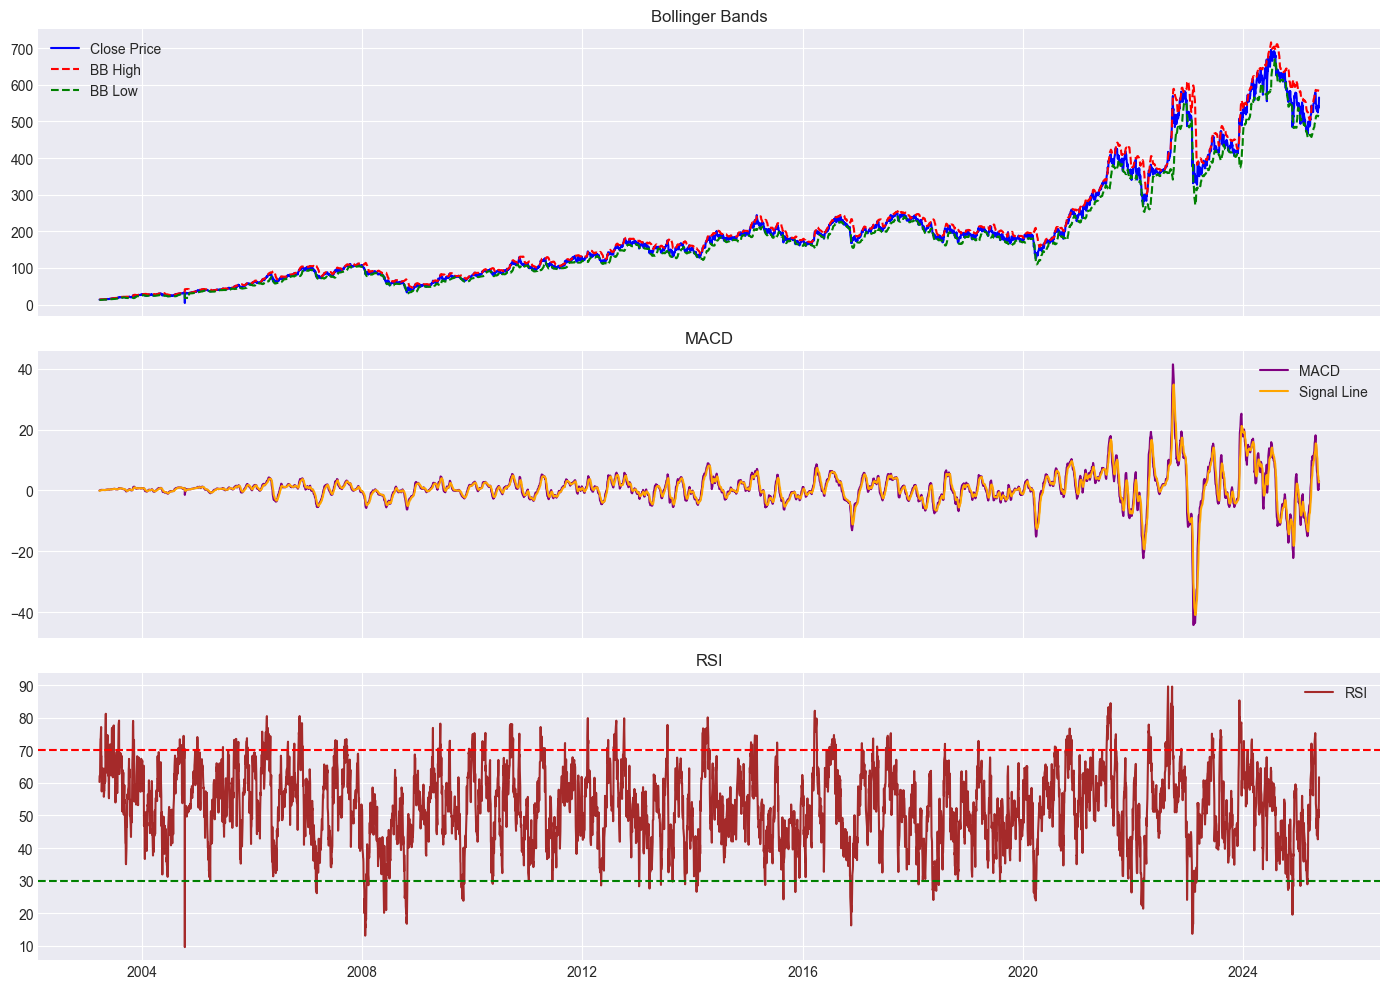

In [74]:
import matplotlib.pyplot as plt

# Set up the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(14, 10), sharex=True)

# Plot Bollinger Bands
ax1.plot(df['Close'], label='Close Price', color='blue')
ax1.plot(df['BB_high'], label='BB High', color='red', linestyle='--')
ax1.plot(df['BB_low'], label='BB Low', color='green', linestyle='--')
ax1.set_title('Bollinger Bands')
ax1.legend()

# Plot MACD and Signal line
ax2.plot(df['MACD'], label='MACD', color='purple')
ax2.plot(df['MACD_signal'], label='Signal Line', color='orange')
ax2.set_title('MACD')
ax2.legend()

# Plot RSI
ax3.plot(df['RSI'], label='RSI', color='brown')
ax3.axhline(70, color='red', linestyle='--')
ax3.axhline(30, color='green', linestyle='--')
ax3.set_title('RSI')
ax3.legend()

plt.tight_layout()
plt.show()


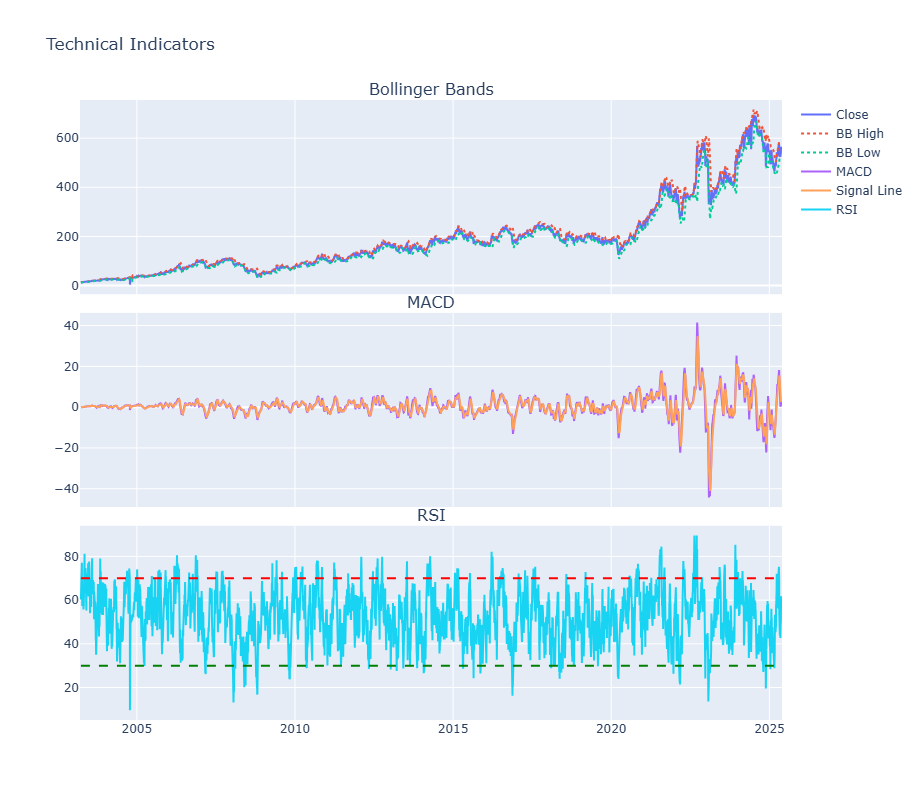

In [75]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.03, subplot_titles=('Bollinger Bands', 'MACD', 'RSI'))

# Bollinger Bands
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], name='Close'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['BB_high'], name='BB High', line=dict(dash='dot')), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['BB_low'], name='BB Low', line=dict(dash='dot')), row=1, col=1)

# MACD
fig.add_trace(go.Scatter(x=df.index, y=df['MACD'], name='MACD'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['MACD_signal'], name='Signal Line'), row=2, col=1)

# RSI
fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], name='RSI'), row=3, col=1)
fig.add_shape(type='line', x0=df.index[0], x1=df.index[-1], y0=70, y1=70,
              line=dict(color='red', dash='dash'), row=3, col=1)
fig.add_shape(type='line', x0=df.index[0], x1=df.index[-1], y0=30, y1=30,
              line=dict(color='green', dash='dash'), row=3, col=1)

fig.update_layout(height=800, title_text="Technical Indicators")
fig.show()


In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assume df is already preprocessed with these 7 columns:
# ['LogReturn', 'RSI', 'MACD', 'MACD_signal', 'BB_high', 'BB_low', 'GARCH_vol']

# Scale features
features = df[['LogReturn', 'RSI', 'MACD', 'MACD_signal', 'BB_high', 'BB_low', 'GARCH_vol']].values
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Create sequences
sequence_length = 30
X, y = [], []

for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i + sequence_length])
    y.append(features_scaled[i + sequence_length][0])  # Predicting next log return

X = np.array(X)
y = np.array(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Build and train LSTM model
model = Sequential([
    LSTM(64, input_shape=(sequence_length, X.shape[2]), return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history3=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
137/137 [==============================] - 6s 24ms/step - loss: 0.0113 - val_loss: 0.0040
Epoch 2/20
137/137 [==============================] - 3s 19ms/step - loss: 2.0678e-04 - val_loss: 0.0017
Epoch 3/20
137/137 [==============================] - 3s 19ms/step - loss: 1.7700e-04 - val_loss: 0.0014
Epoch 4/20
137/137 [==============================] - 3s 20ms/step - loss: 1.6545e-04 - val_loss: 0.0012
Epoch 5/20
137/137 [==============================] - 2s 18ms/step - loss: 1.7048e-04 - val_loss: 0.0017
Epoch 6/20
137/137 [==============================] - 3s 18ms/step - loss: 1.6522e-04 - val_loss: 0.0015
Epoch 7/20
137/137 [==============================] - 2s 18ms/step - loss: 1.6512e-04 - val_loss: 0.0015
Epoch 8/20
137/137 [==============================] - 3s 18ms/step - loss: 1.6309e-04 - val_loss: 0.0011
Epoch 9/20
137/137 [==============================] - 2s 18ms/step - loss: 1.5915e-04 - val_loss: 9.5164e-04
Epoch 10/20
137/137 [==============================] - 

In [81]:
future_days = 5
forecast = []

# Use the last 'sequence_length' rows as the initial input
last_input = features_scaled[-sequence_length:].copy()

for _ in range(future_days):
    input_scaled = last_input.reshape((1, sequence_length, features_scaled.shape[1]))  # (1, 30, 7)

    # Predict next log return
    next_log_return = model.predict(input_scaled, verbose=0)[0][0]
    forecast.append(next_log_return)

    # Prepare the next input vector
    # Copy the last known feature vector, but replace the log return with the predicted one
    next_features = last_input[-1].copy()
    next_features[0] = next_log_return  # Replace only log return

    # Append this new row to the input sequence
    last_input = np.vstack((last_input[1:], next_features))


In [86]:
from arch import arch_model

garch = arch_model(df['LogReturn']*100, vol='Garch', p=1, q=1, dist='normal')
garch_fit = garch.fit(disp='off')
df['GARCH_vol'] = np.sqrt(garch_fit.conditional_volatility / 100**2)  # scaled back


In [87]:
from sklearn.preprocessing import MinMaxScaler
features = df[['LogReturn', 'RSI', 'MACD', 'MACD_signal', 'BB_high', 'BB_low', 'GARCH_vol']].values

# Scale features between 0 and 1
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


In [88]:
sequence_length = 30
X, y = [], []

for i in range(len(features_scaled) - sequence_length):
    X.append(features_scaled[i:i + sequence_length])
    y.append(features_scaled[i + sequence_length][0])  # next log return

X = np.array(X)
y = np.array(y)

In [89]:
# Train/test split (no shuffle for time series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# -----------------------------
# Step 5: Build and Train LSTM Model
# -----------------------------
model = Sequential([
    LSTM(64, input_shape=(sequence_length, X.shape[2])),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(32,activation="relu"),
    Dense(1)
])

In [106]:
model.compile(optimizer='adam', loss='mse')
history4=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/20
137/137 - 6s - loss: 1.6607e-04 - val_loss: 0.0037 - 6s/epoch - 42ms/step
Epoch 2/20
137/137 - 2s - loss: 1.6033e-04 - val_loss: 0.0032 - 2s/epoch - 16ms/step
Epoch 3/20
137/137 - 2s - loss: 1.5774e-04 - val_loss: 0.0034 - 2s/epoch - 17ms/step
Epoch 4/20
137/137 - 2s - loss: 1.5935e-04 - val_loss: 0.0035 - 2s/epoch - 16ms/step
Epoch 5/20
137/137 - 2s - loss: 1.5971e-04 - val_loss: 0.0036 - 2s/epoch - 17ms/step
Epoch 6/20
137/137 - 2s - loss: 1.5271e-04 - val_loss: 0.0037 - 2s/epoch - 17ms/step
Epoch 7/20
137/137 - 2s - loss: 1.5882e-04 - val_loss: 0.0030 - 2s/epoch - 17ms/step
Epoch 8/20
137/137 - 2s - loss: 1.5489e-04 - val_loss: 0.0024 - 2s/epoch - 17ms/step
Epoch 9/20
137/137 - 2s - loss: 1.5426e-04 - val_loss: 0.0027 - 2s/epoch - 16ms/step
Epoch 10/20
137/137 - 2s - loss: 1.5332e-04 - val_loss: 0.0024 - 2s/epoch - 17ms/step
Epoch 11/20
137/137 - 2s - loss: 1.4877e-04 - val_loss: 0.0022 - 2s/epoch - 17ms/step
Epoch 12/20
137/137 - 2s - loss: 1.5899e-04 - val_loss: 0.0026 

In [155]:
# -----------------------------
# Step 6: Forecast Future Log Returns
# -----------------------------
future_days = 5
forecast = []

last_input = features_scaled[-sequence_length:].copy()

max_log_return = 0.0009

for _ in range(future_days):
    input_scaled = last_input.reshape((1, sequence_length, features_scaled.shape[1]))
    next_log_return = model.predict(input_scaled, verbose=0)[0][0]
    next_log_return = np.clip(next_log_return, -max_log_return, max_log_return)
    forecast.append(next_log_return)
    
    next_features = last_input[-1].copy()
    next_features[0] = next_log_return
    last_input = np.vstack((last_input[1:], next_features))

In [156]:
# -----------------------------
# Step 7: Convert Log Returns Back to Price
# -----------------------------
last_real_price = df['Close'].iloc[-1]
price_forecast = [last_real_price]

for log_ret in forecast:
    next_price = price_forecast[-1] * np.exp(log_ret)
    price_forecast.append(next_price)

price_forecast = price_forecast[1:]
price_forecast

[565.5087288936629,
 566.0179158494271,
 566.5275612797342,
 567.0376655973969,
 567.5482292155997]

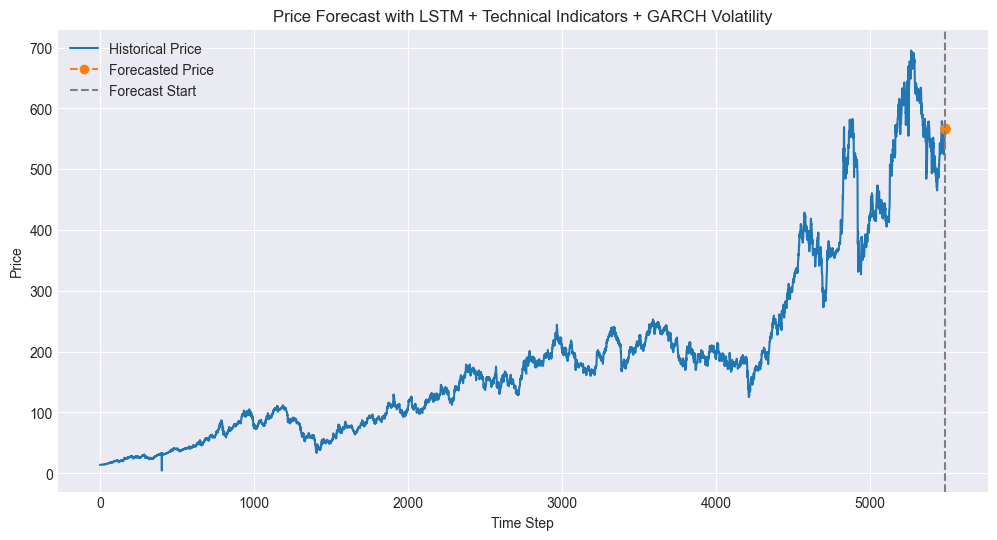

In [157]:
plt.figure(figsize=(12, 6))

# Plot historical price (index 0 to len(df)-1)
plt.plot(df['Close'].values, label='Historical Price')

# Plot forecast price starting at len(df)
forecast_start_index = len(df)
forecast_indices = np.arange(forecast_start_index, forecast_start_index + len(price_forecast))

plt.plot(forecast_indices, price_forecast, label='Forecasted Price', linestyle='--', marker='o')

plt.axvline(x=forecast_start_index - 1, color='gray', linestyle='dashed', label='Forecast Start')

plt.title("Price Forecast with LSTM + Technical Indicators + GARCH Volatility")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [158]:
# Assume y_train contains the log returns for training samples

# Calculate mean log return on training data
mean_log_return = np.mean(y_train)

# Center the training and test targets by subtracting mean
y_train_centered = y_train - mean_log_return
y_test_centered = y_test - mean_log_return


In [123]:
history4=model.fit(X_train, y_train_centered, epochs=20, batch_size=32, validation_data=(X_test, y_test_centered), verbose=2)


Epoch 1/20
137/137 - 2s - loss: 0.0086 - val_loss: 1.7898e-04 - 2s/epoch - 18ms/step
Epoch 2/20
137/137 - 2s - loss: 1.4743e-04 - val_loss: 1.4670e-04 - 2s/epoch - 17ms/step
Epoch 3/20
137/137 - 2s - loss: 1.4611e-04 - val_loss: 1.3759e-04 - 2s/epoch - 17ms/step
Epoch 4/20
137/137 - 2s - loss: 1.4779e-04 - val_loss: 1.3286e-04 - 2s/epoch - 18ms/step
Epoch 5/20
137/137 - 3s - loss: 1.4743e-04 - val_loss: 1.2562e-04 - 3s/epoch - 19ms/step
Epoch 6/20
137/137 - 3s - loss: 1.4600e-04 - val_loss: 1.3335e-04 - 3s/epoch - 18ms/step
Epoch 7/20
137/137 - 3s - loss: 1.4550e-04 - val_loss: 1.1918e-04 - 3s/epoch - 19ms/step
Epoch 8/20
137/137 - 2s - loss: 1.4550e-04 - val_loss: 1.1674e-04 - 2s/epoch - 18ms/step
Epoch 9/20
137/137 - 3s - loss: 1.4545e-04 - val_loss: 1.1667e-04 - 3s/epoch - 18ms/step
Epoch 10/20
137/137 - 3s - loss: 1.4565e-04 - val_loss: 1.3355e-04 - 3s/epoch - 20ms/step
Epoch 11/20
137/137 - 3s - loss: 1.4369e-04 - val_loss: 1.6503e-04 - 3s/epoch - 20ms/step
Epoch 12/20
137/137 - 3

In [162]:
# --- Forecasting ---
future_days = 5
forecast_log_returns = []
log_returns=df["LogReturn"]
# Start with the last known sequence of log returns
#last_input = log_returns[-sequence_length:].to_numpy().copy()


for _ in range(future_days):
    input_seq = last_input.reshape((1, sequence_length, 7))
    pred_centered = model.predict(input_seq, verbose=0)[0][0]
    
    # Add back mean
    pred_log_return = pred_centered + mean_log_return
    
    # Optional clipping
    pred_log_return = np.clip(pred_log_return, -0.005, 0.005)
    
    forecast_log_returns.append(pred_log_return)
    
    # Update input sequence for next prediction
    last_input = np.roll(last_input, -1)
    last_input[-1] = pred_log_return

# --- Convert log returns back to prices ---
prices = df["Close"]
last_price = prices[-1]
forecast_prices = [last_price * np.exp(forecast_log_returns[0])]

for i in range(1, future_days):
    next_price = forecast_prices[-1] * np.exp(forecast_log_returns[i])
    forecast_prices.append(next_price)


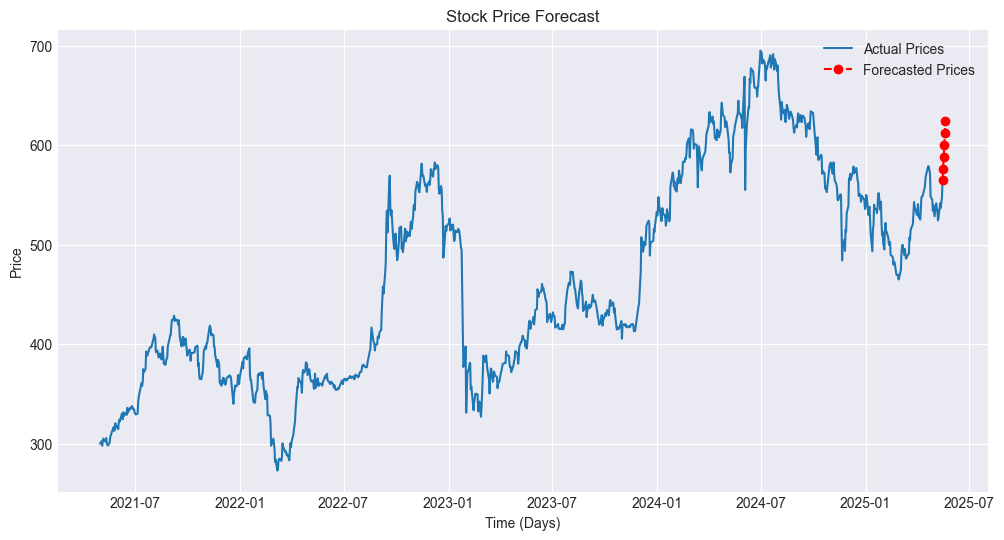

In [163]:
# last date in actual data
last_date = actual_index[-1]

# create date range starting from the last_date, with length future_days + 1
forecast_index = pd.date_range(start=last_date, periods=future_days + 1, freq='D')  # daily freq, adjust if needed

# Now plot
plt.figure(figsize=(12,6))

plt.plot(prices[-1000:], label='Actual Prices')

plt.plot(forecast_index, full_forecast_prices, marker='o', linestyle='--', color='red', label='Forecasted Prices')

plt.title('Stock Price Forecast')
plt.xlabel('Time (Days)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [164]:
forecast_prices

[567.8320742855616,
 570.6783444025549,
 573.5388815078811,
 576.4137571151168,
 579.3030430963021]